## **Student Performance Indicator**
### **Life cycle of Machine learning Project**
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### **1) Problem statement**
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
### **2) Data Collection**
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### **2.1 Import Data and Required Packages**
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Data/raw.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.shape

(1000, 8)

### **2.2 Dataset information**
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,- high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score
### **3. Data Checks to perform**
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column
### **3.1 Check Missing values**

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### **There are no missing values in the data set**


### **3.2 Check Duplicates**

In [8]:
df.duplicated().sum()

0

#### **There are no duplicates values in the data set**



### **3.3 Check data types**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
category=df.columns.values


In [12]:
category

array(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'], dtype=object)

In [18]:
for col in range(len(category)):
    if df[category[col]].dtype !="int64":
        print(f"categories in {category[col]} variable: {df[category[col]].unique()}")

categories in gender variable: ['female' 'male']
categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch variable: ['standard' 'free/reduced']
categories in test_preparation_course variable: ['none' 'completed']


In [42]:
# defining the number of numerical & categorical col

numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print(f"We have {len(numerical_features)} numerical features and they are : {numerical_features}")
print(f"We have {len(categorical_features)} numerical features and they are : {categorical_features}")

We have 3 numerical features and they are : ['math_score', 'reading_score', 'writing_score']
We have 5 numerical features and they are : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [44]:
df2=df.copy(deep=True)

In [45]:
df2

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [55]:
df2['Total_Score']=df2['math_score']+df2['reading_score']+df2['writing_score']
df2['Avarege_Score']=df2['Total_Score']/3

In [56]:
df2

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Avarege_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [64]:
math_full=df2[df2['math_score']==100]['Avarege_Score'].count()
reading_full=df2[df2['reading_score']==100]['Avarege_Score'].count()
writing_full=df2[df2['writing_score']==100]['Avarege_Score'].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in Maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [65]:
math_less_20=df2[df2['math_score'] <= 20]['Avarege_Score'].count()
reading_less_20=df2[df2['reading_score'] <= 20]['Avarege_Score'].count()
writing_less_20=df2[df2['writing_score'] <= 20]['Avarege_Score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


### **Insights**
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## **4. Exploring Data ( Visualization )**

### **4.1 Visualize average score distribution to make some conclusion.**
- Histogram
- Kernel Distribution Function (KDE)

### **4.1.1 Histogram & KDE**

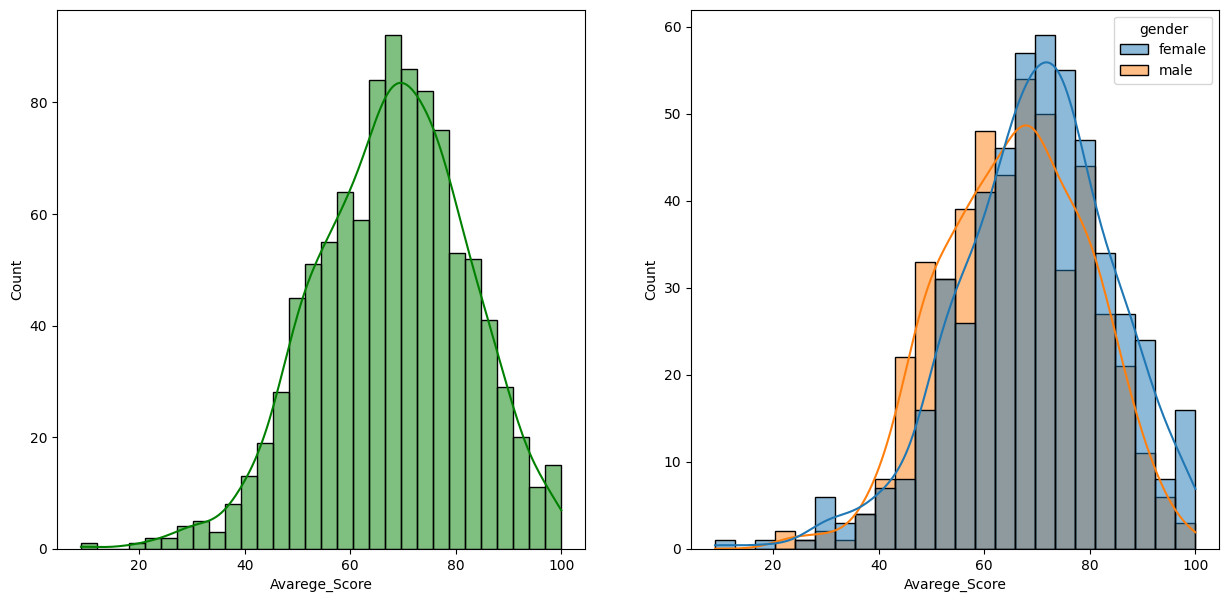

In [74]:
fig,axs=plt.subplots(1,2 ,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df2,x='Avarege_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df2,x='Avarege_Score',kde=True,hue='gender')
plt.show()

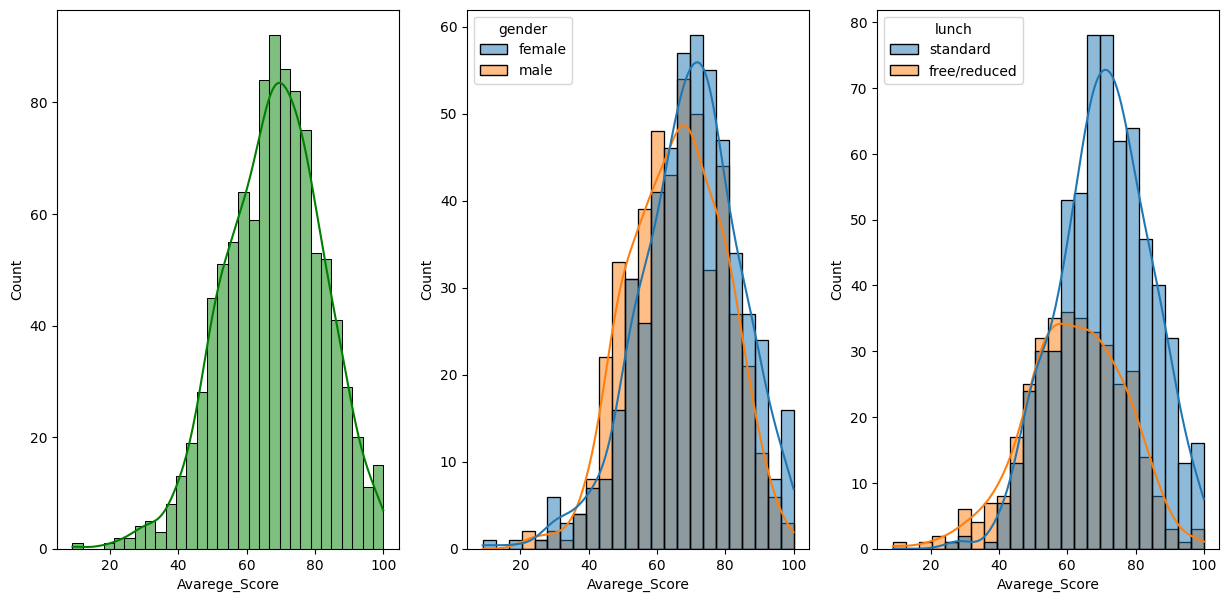

In [82]:
fig,axs=plt.subplots(1,3 ,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df2,x='Avarege_Score',bins=30,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df2,x='Avarege_Score',kde=True,hue='gender')
plt.subplot(133)
sns.histplot(data=df2,x='Avarege_Score',kde=True,hue='lunch')
plt.show()

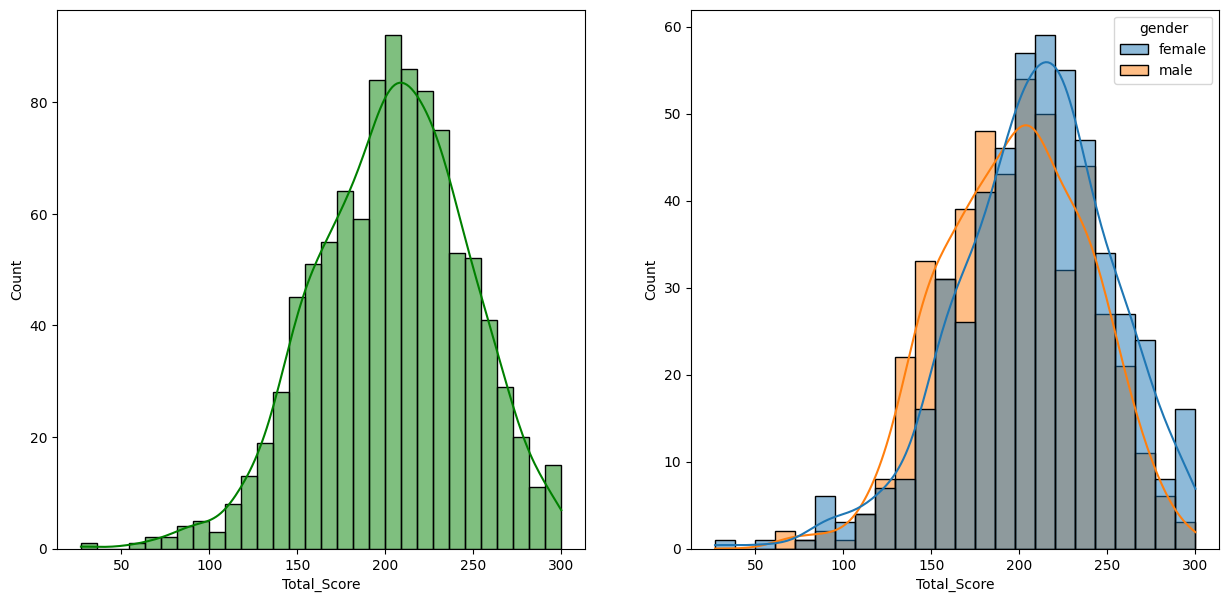

In [84]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df2,x="Total_Score",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df2,x='Total_Score',hue='gender',kde=True)
plt.show()

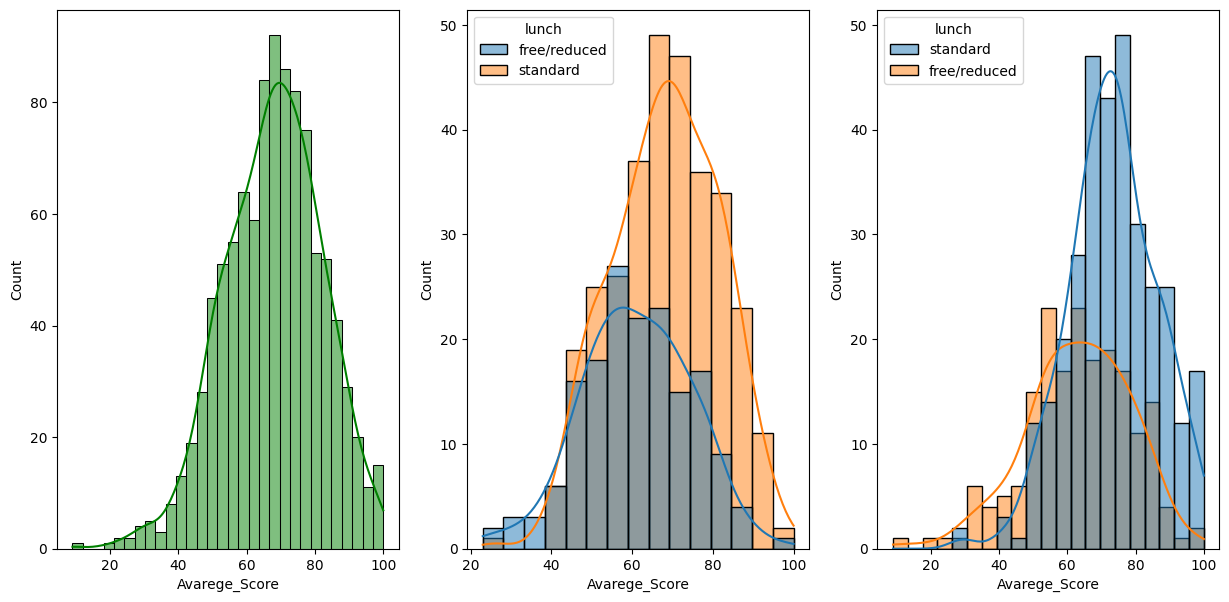

In [85]:
fig,axs=plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df2,x='Avarege_Score',bins=30,kde=True,color='g')
plt.subplot(132)
sns.histplot(data=df2[df2['gender']=='male'],x='Avarege_Score',hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data=df2[df2['gender']=='female'],x='Avarege_Score',hue="lunch",kde=True)
plt.show()

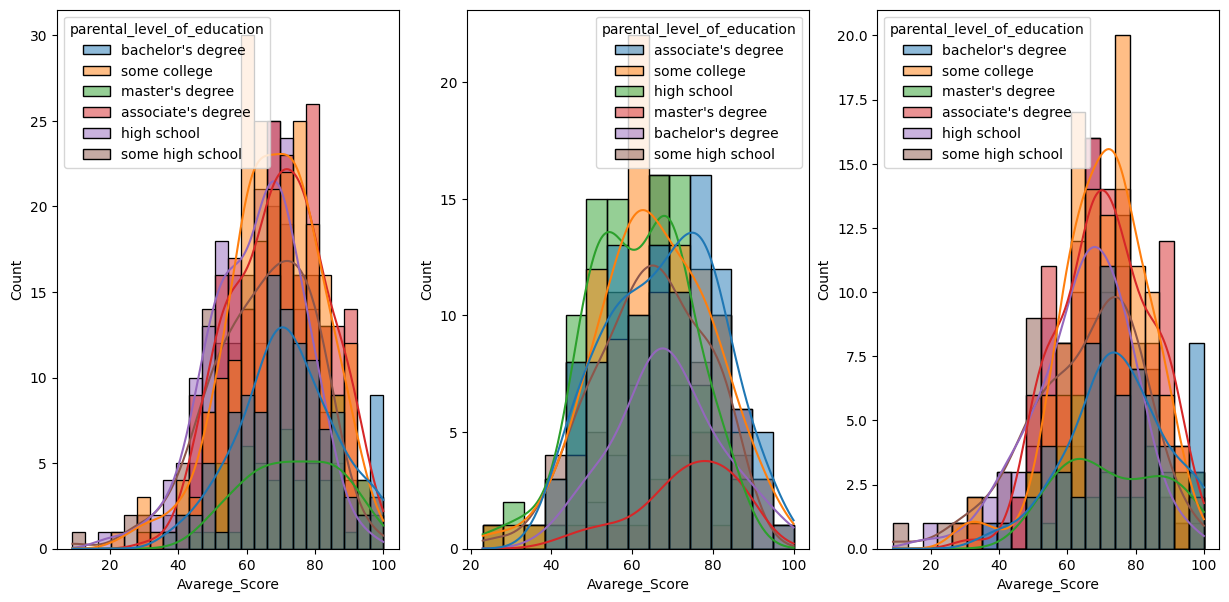

In [91]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
ax =sns.histplot(data=df2,x='Avarege_Score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df2[df.gender=='male'],x='Avarege_Score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df2[df.gender=='female'],x='Avarege_Score',kde=True,hue='parental_level_of_education')
plt.show()

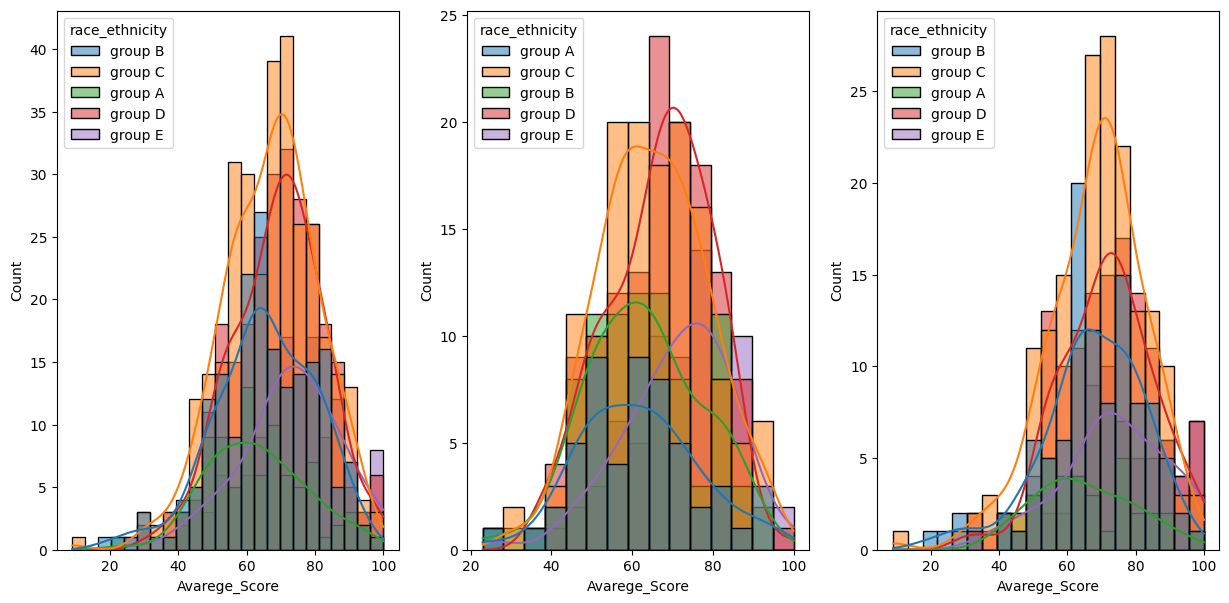

In [93]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
ax =sns.histplot(data=df2,x='Avarege_Score',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df2[df.gender=='male'],x='Avarege_Score',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df2[df.gender=='female'],x='Avarege_Score',kde=True,hue='race_ethnicity')
plt.show()

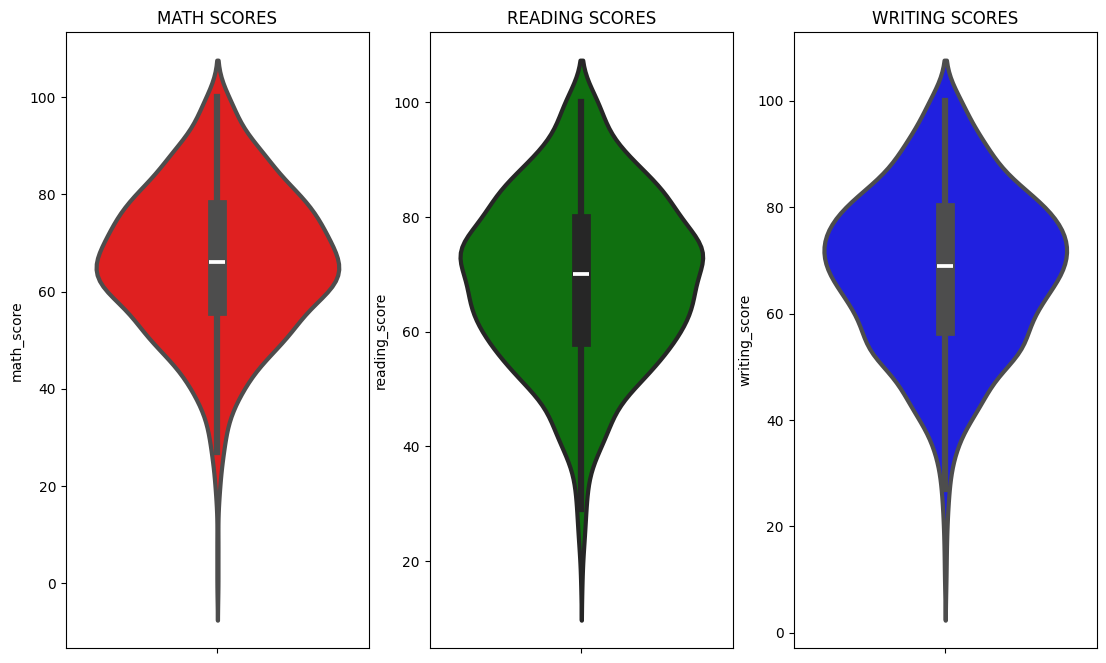

In [94]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

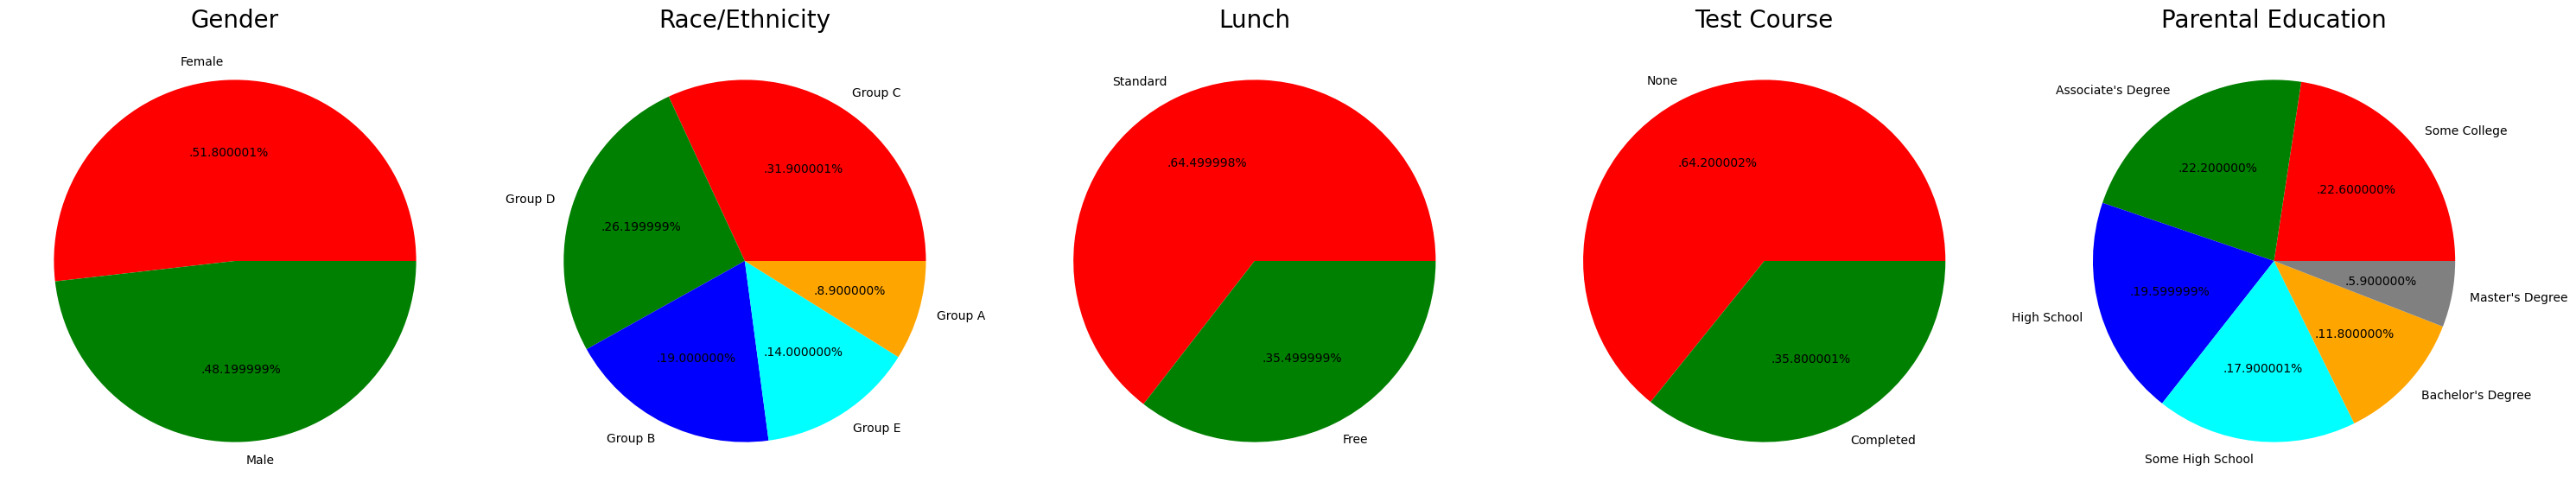

In [100]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df2['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df2['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df2['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df2['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df2['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

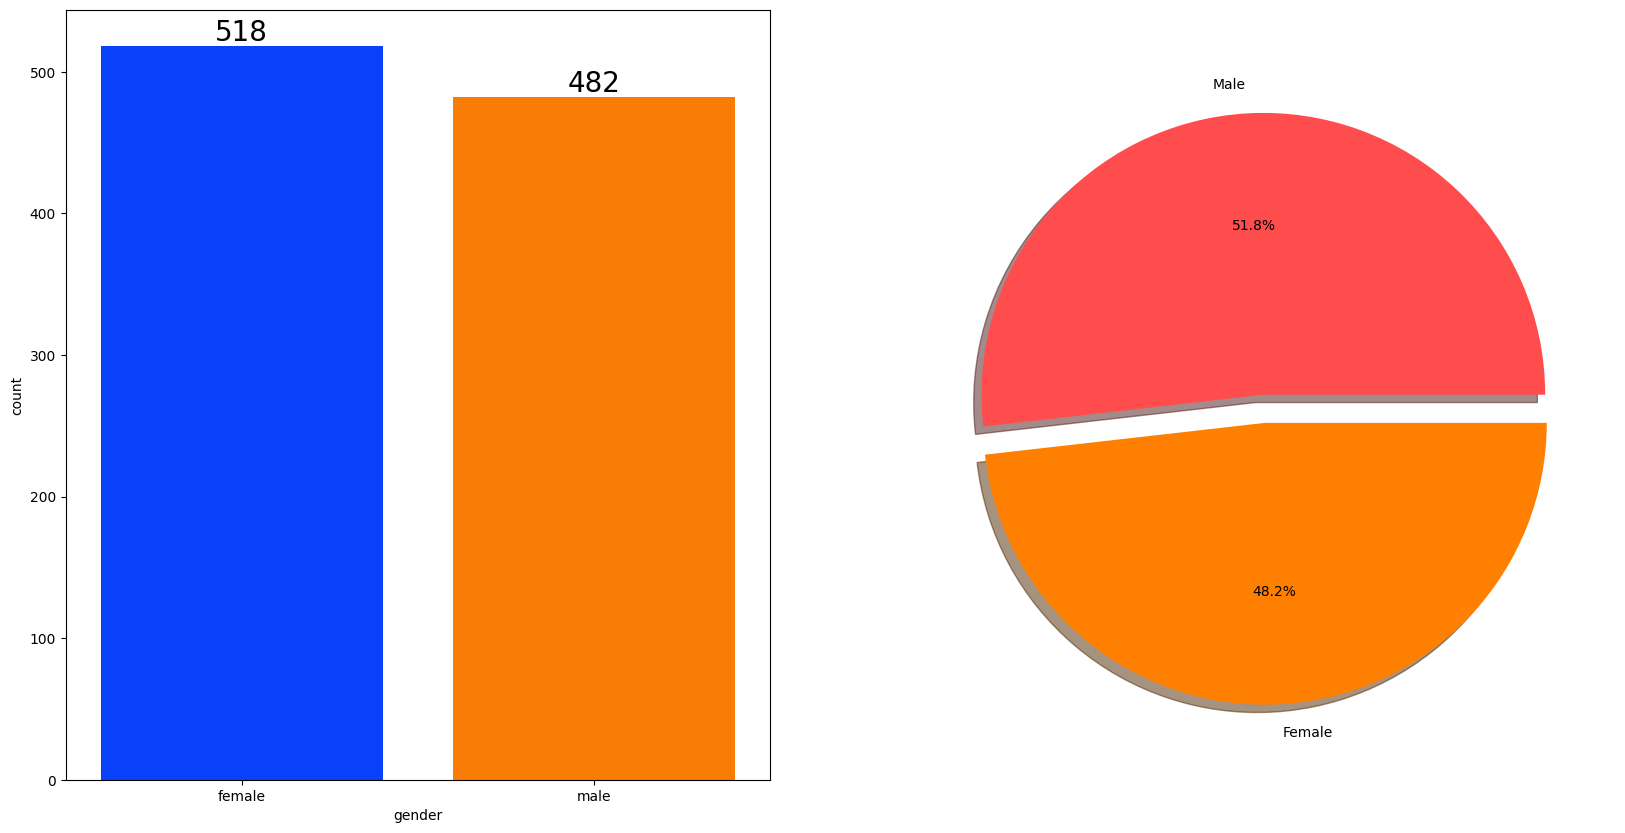

In [101]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df2['gender'],data=df2,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [110]:
gender_group = df2.groupby('gender').mean('Avarege_Score')
gender_group

,math_score,reading_score,writing_score,Total_Score,Avarege_Score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


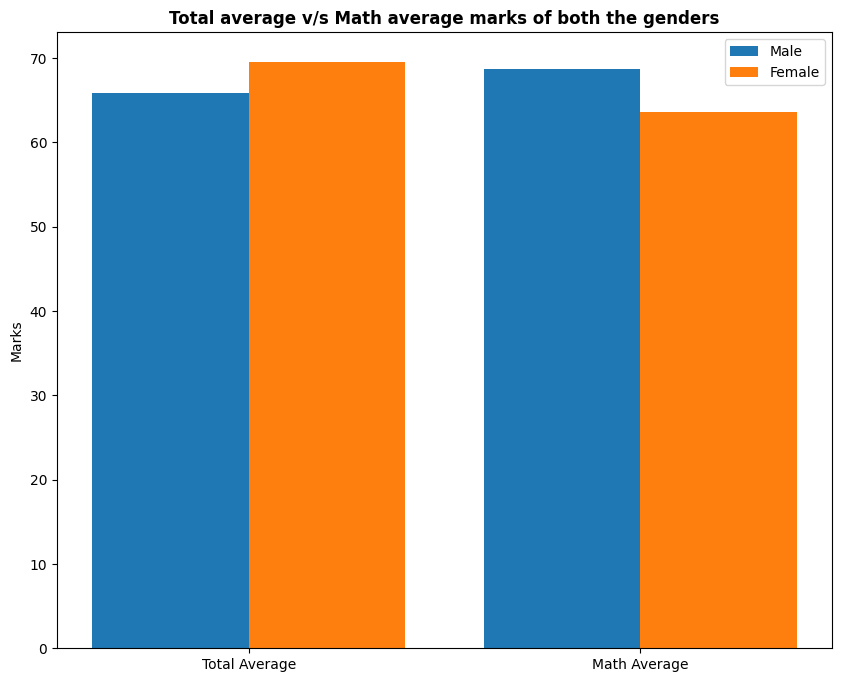

In [111]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Avarege_Score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Avarege_Score'][1], gender_group['math_score'][1]]

X_axis = numpy.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Axes(0.125,0.11;0.352273x0.77)
Axes(0.125,0.11;0.352273x0.77)
Axes(0.125,0.11;0.352273x0.77)
Axes(0.125,0.11;0.352273x0.77)
Axes(0.125,0.11;0.352273x0.77)


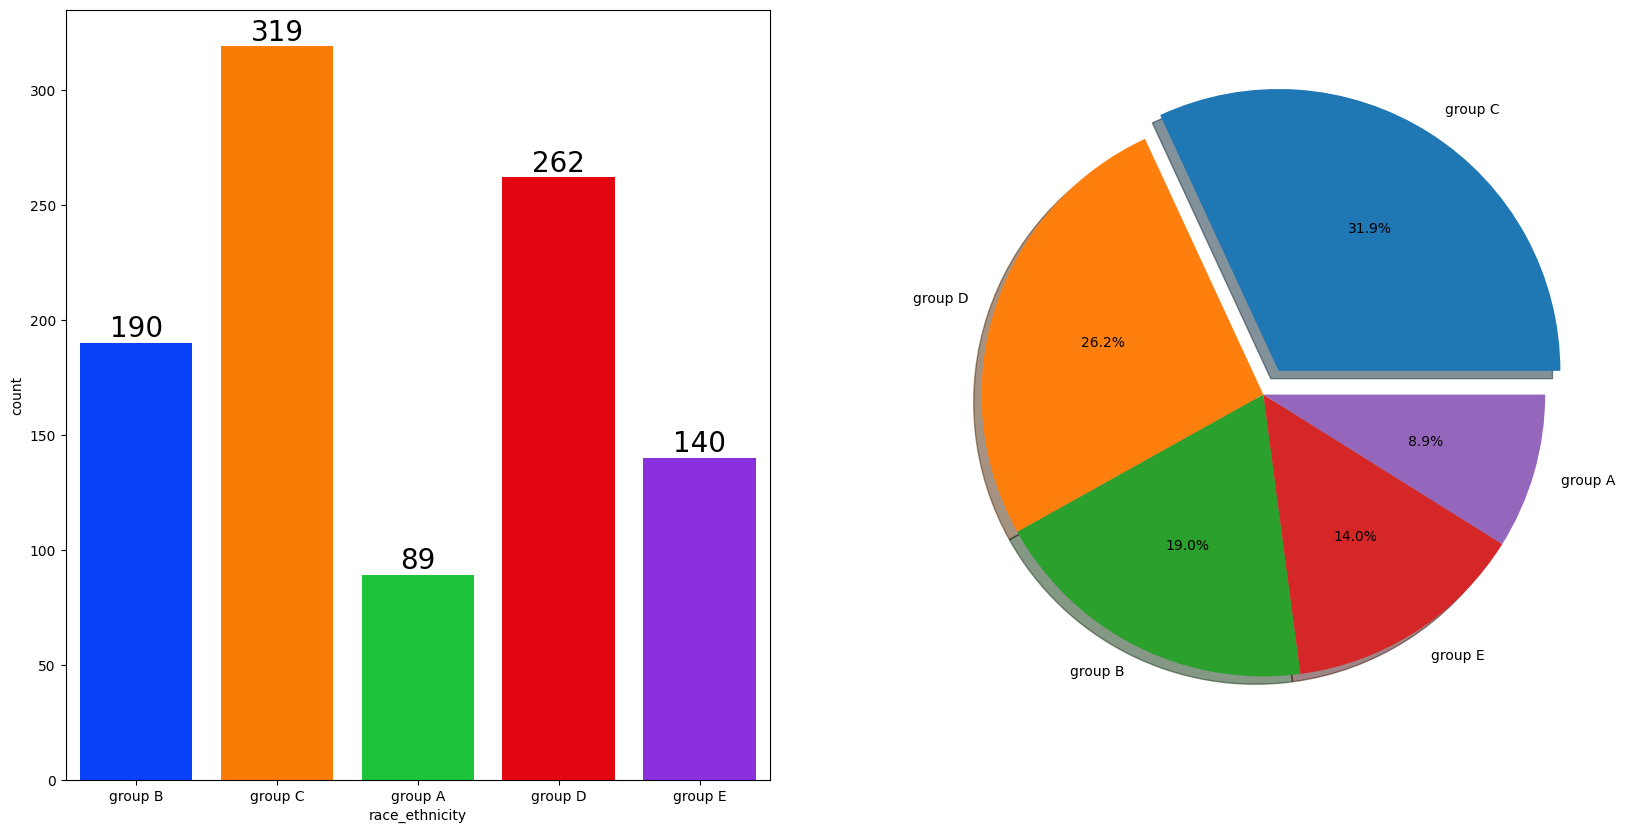

In [118]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df2['race_ethnicity'],data=df2,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df2['race_ethnicity'].value_counts(),labels=df2['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

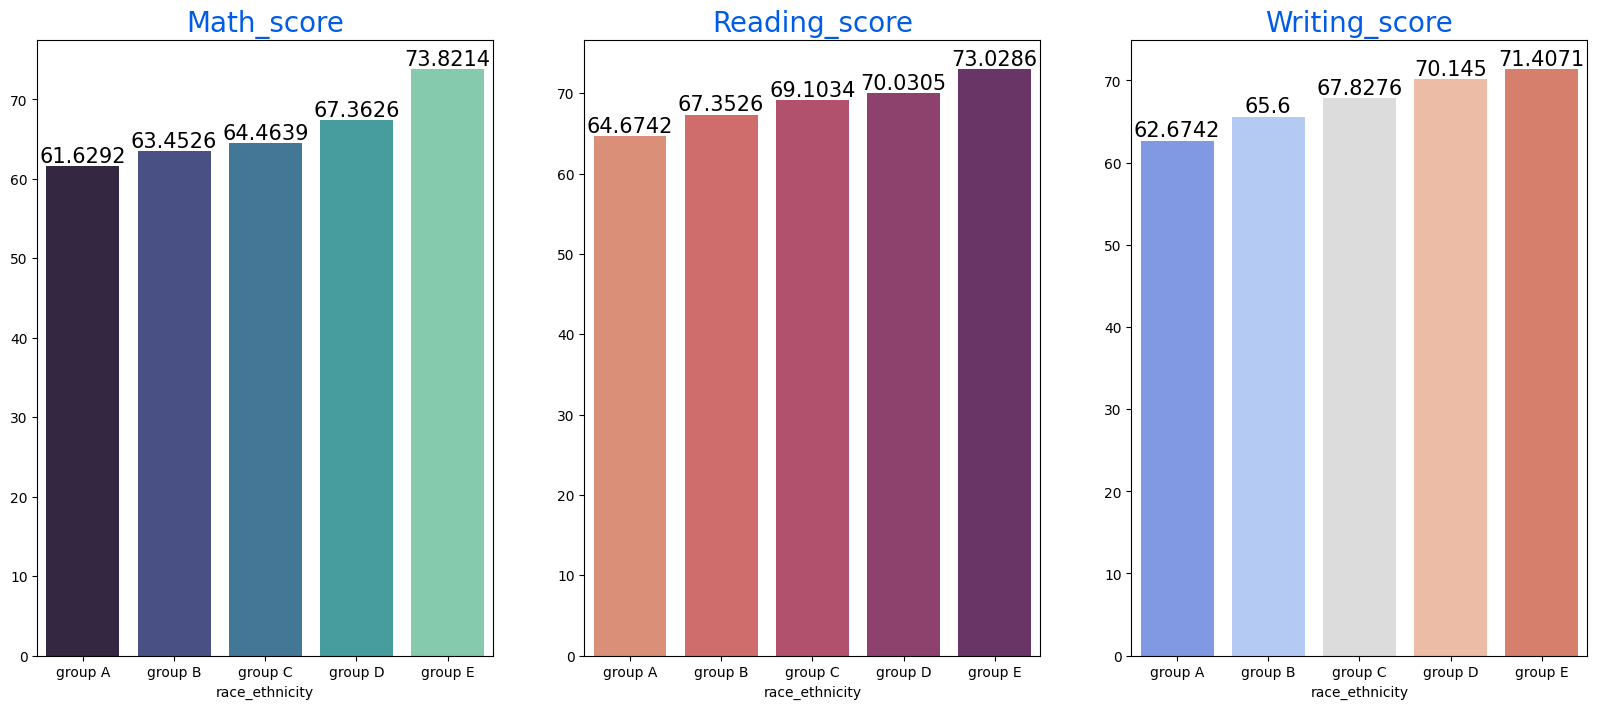

In [119]:
Group_data2=df2.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

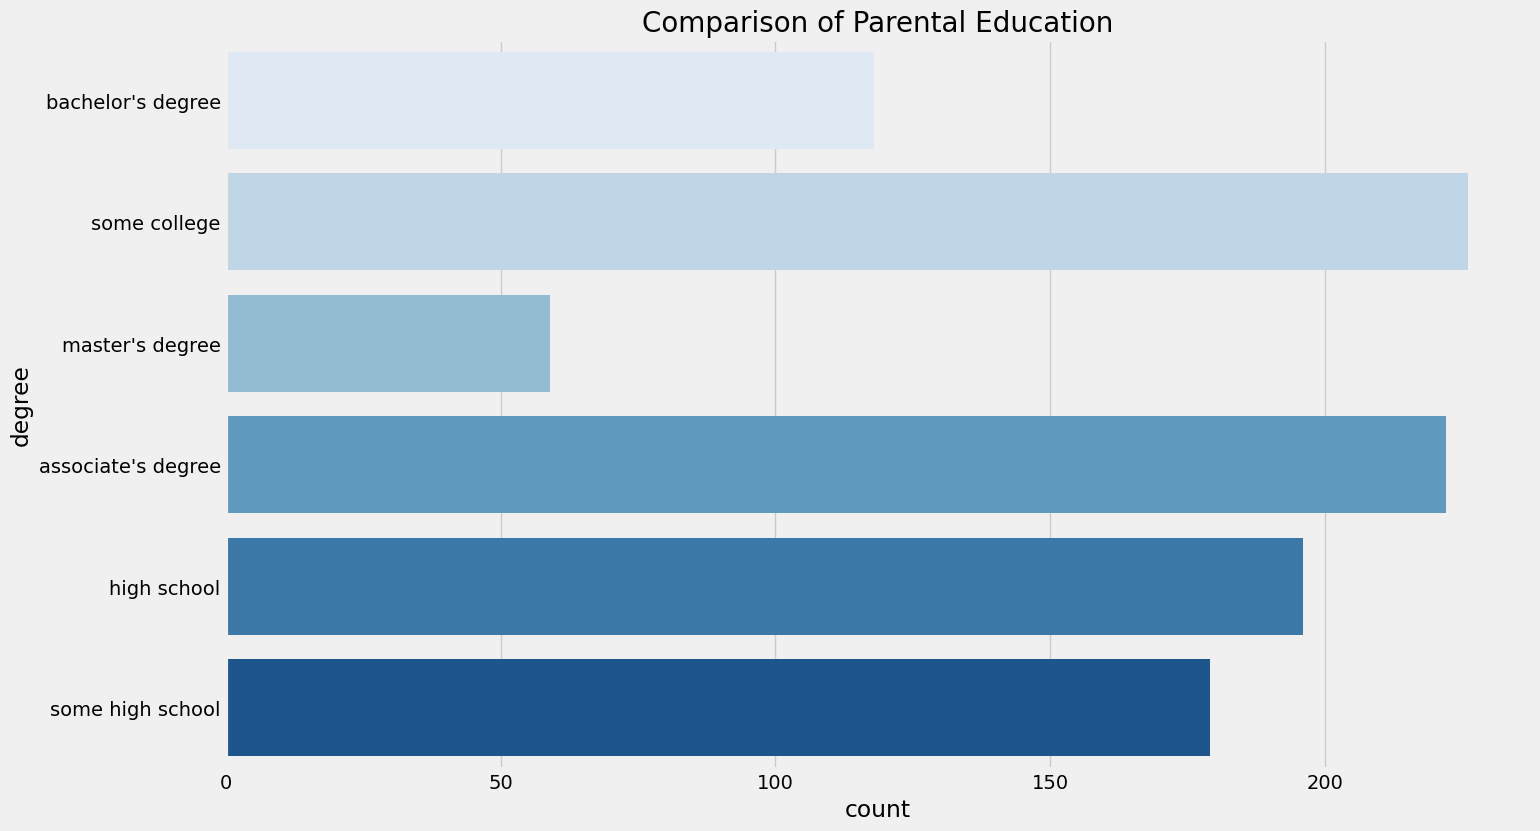

In [121]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('degree')
plt.show()

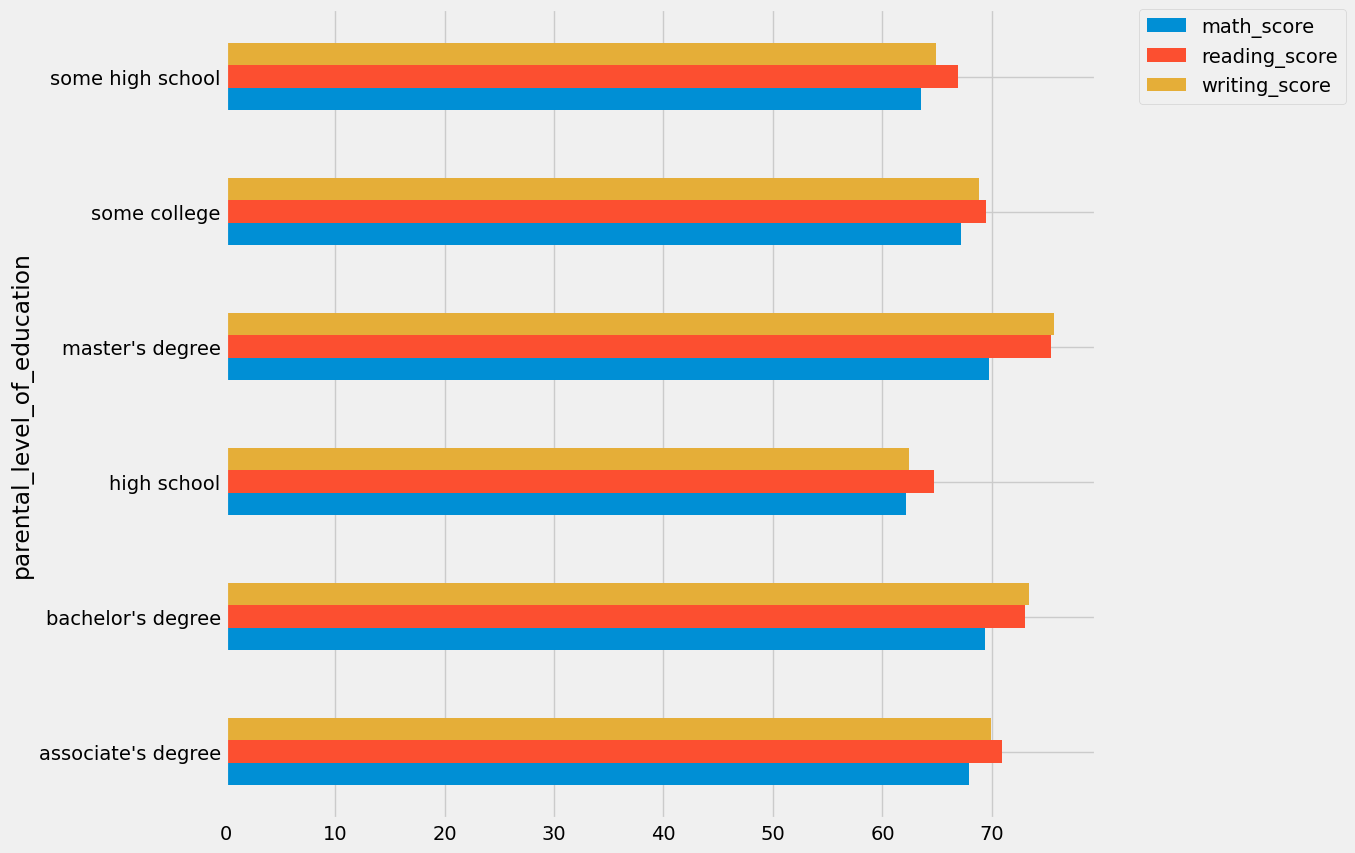

In [123]:
df.groupby('parental_level_of_education').mean('Avarege_Score').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

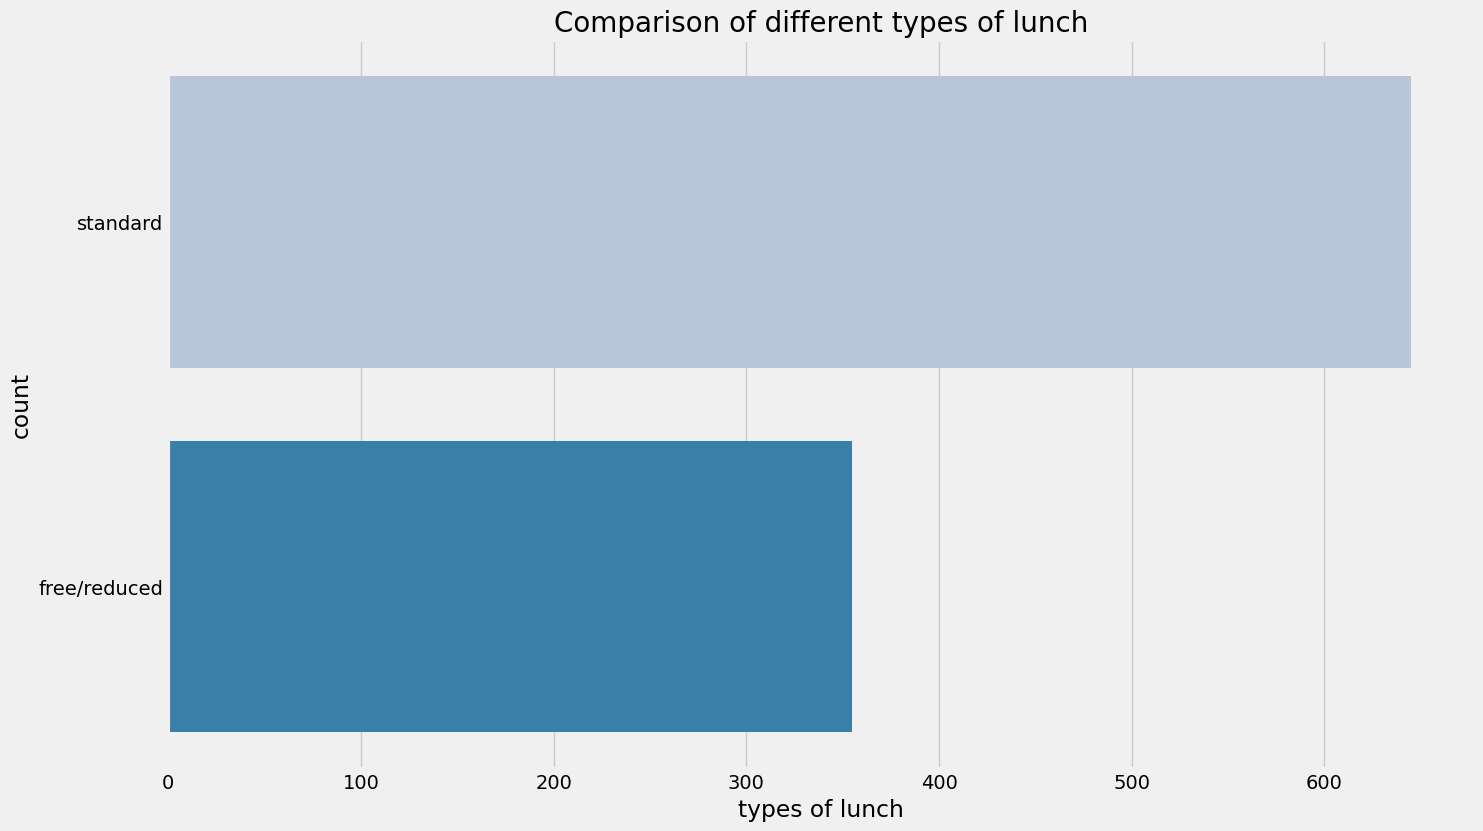

In [125]:
plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(df2['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

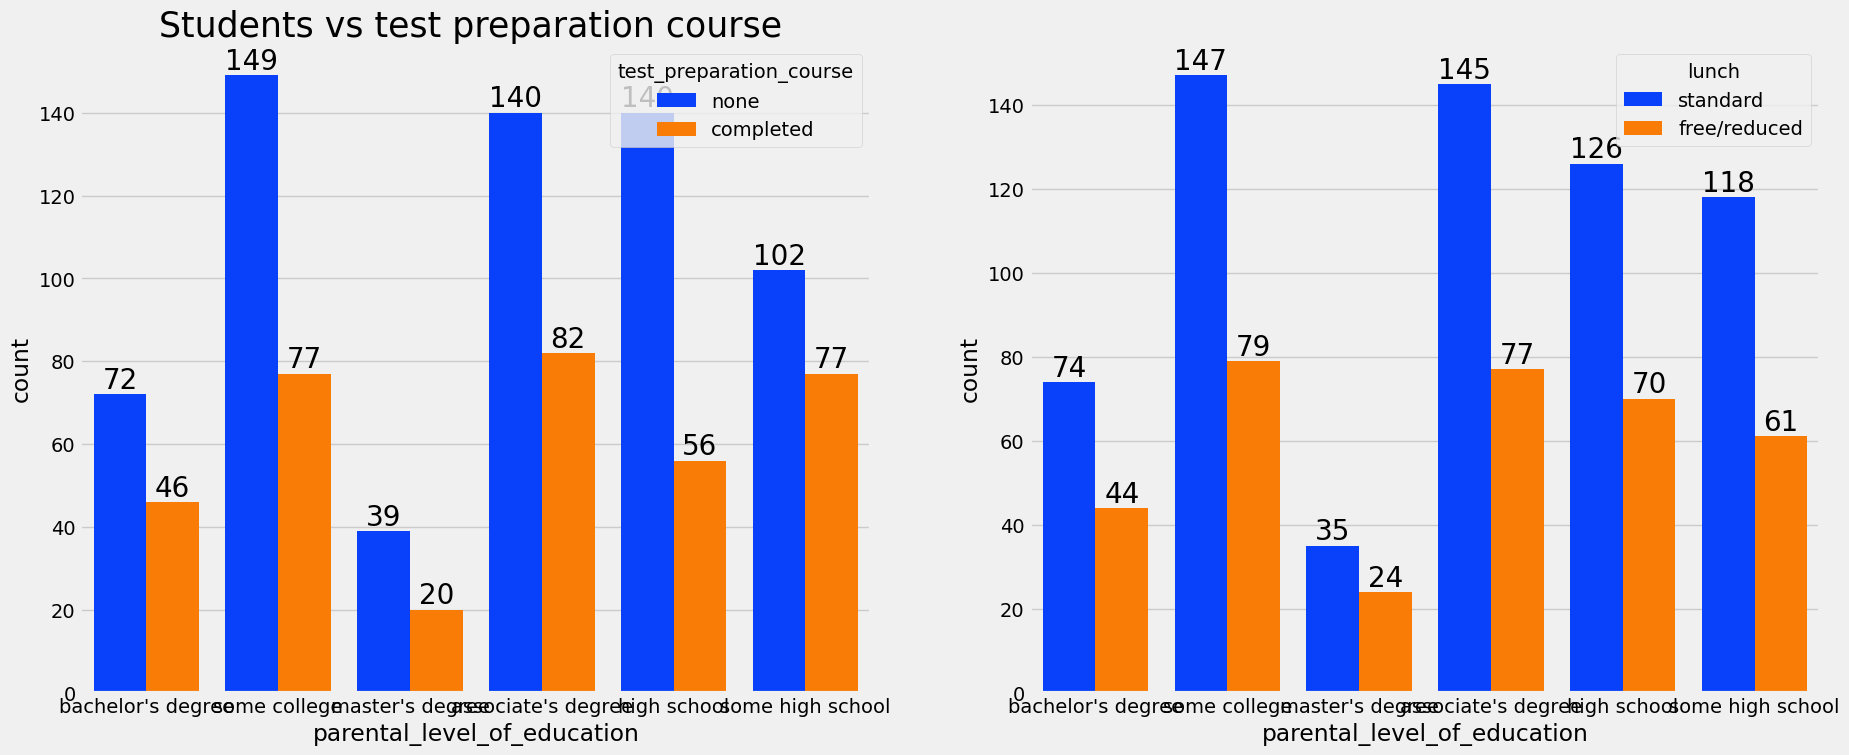

In [129]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### **Insights**
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch
### **4.4.5 TEST PREPARATION COURSE COLUMN**
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

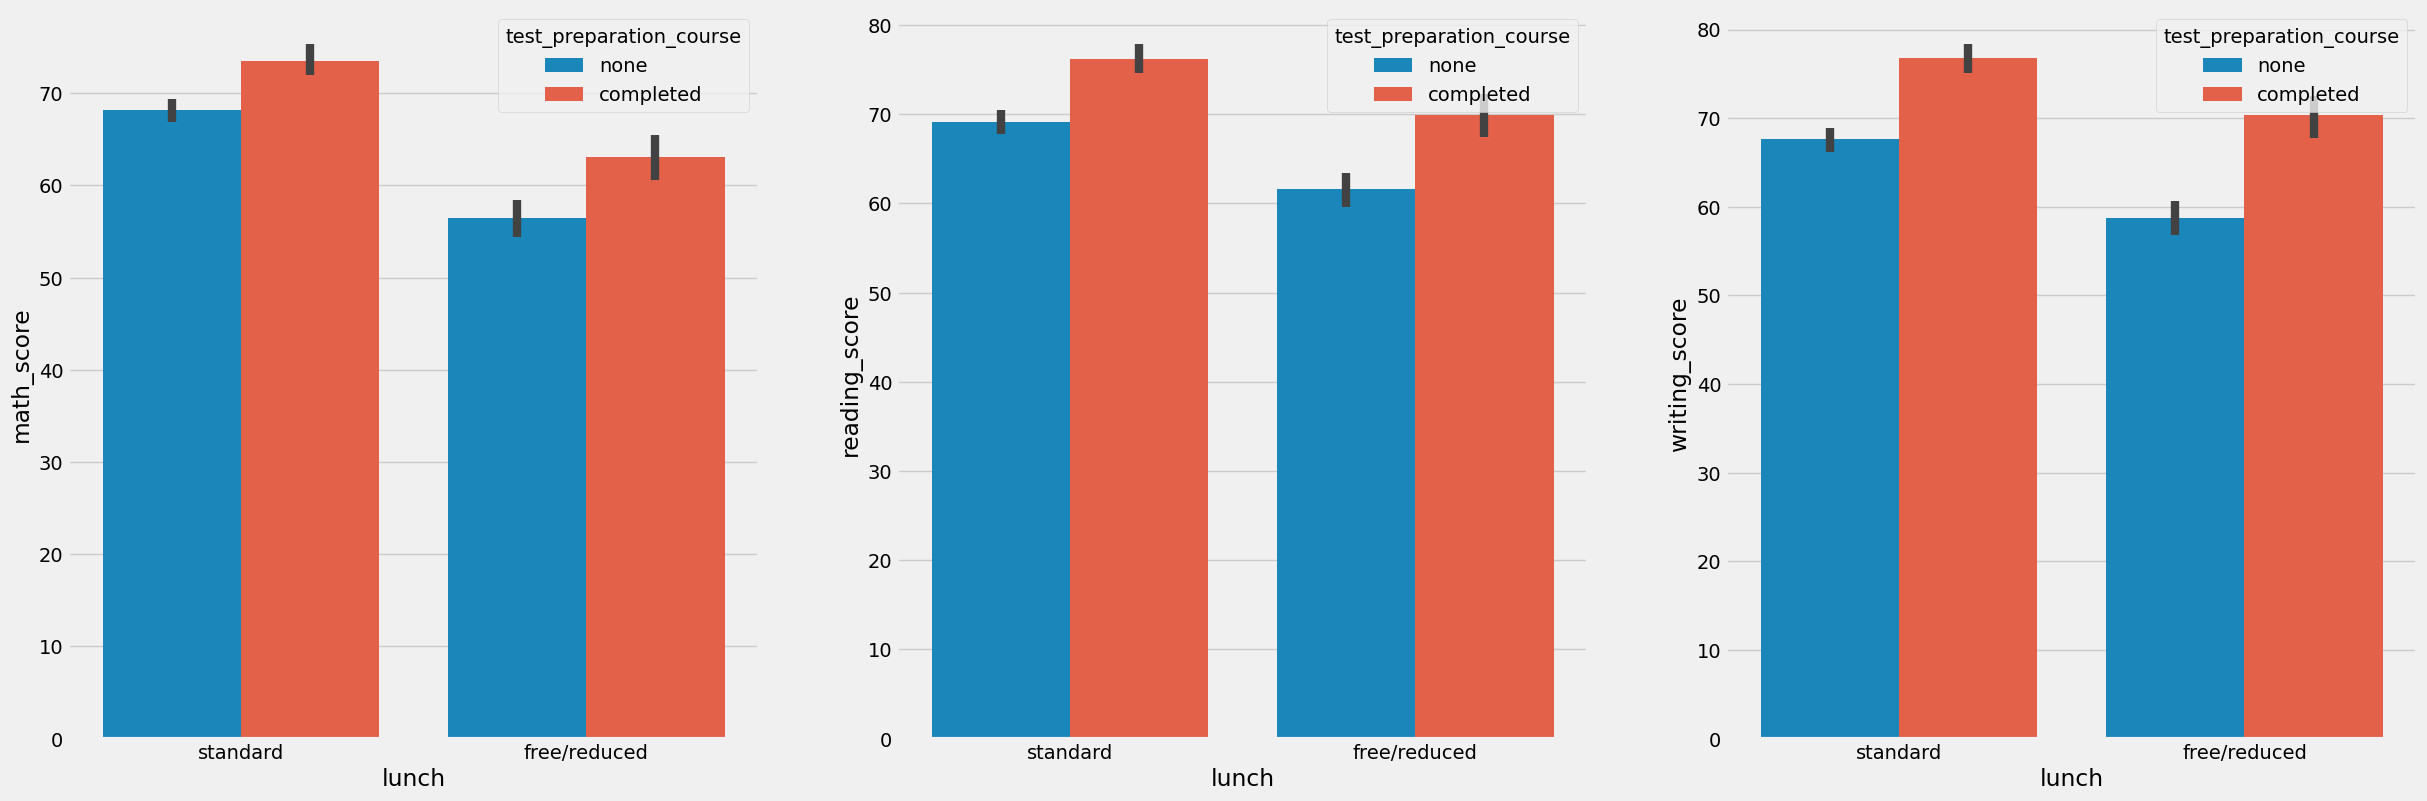

In [150]:
plt.subplots(1,3,figsize=(27,9))
plt.subplot(131)
ax=sns.barplot (data=df2,x=df2['lunch'], y=df2['math_score'], hue=df2['test_preparation_course'])
plt.subplot(132)
ax=sns.barplot (data=df2,x=df2['lunch'], y=df2['reading_score'], hue=df2['test_preparation_course'])
plt.subplot(133)
ax=sns.barplot (data=df2,x=df2['lunch'], y=df2['writing_score'], hue=df2['test_preparation_course'])

#### **Insights**
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course



### **4.4.6 CHECKING OUTLIERS**

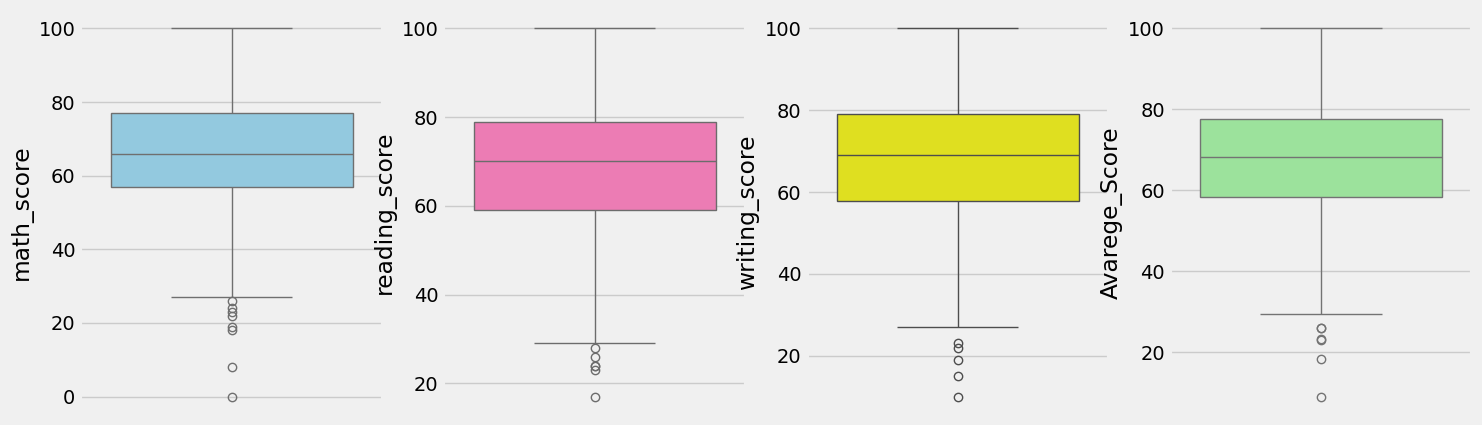

In [152]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df2['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df2['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df2['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df2['Avarege_Score'],color='lightgreen')
plt.show()

### **4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT**

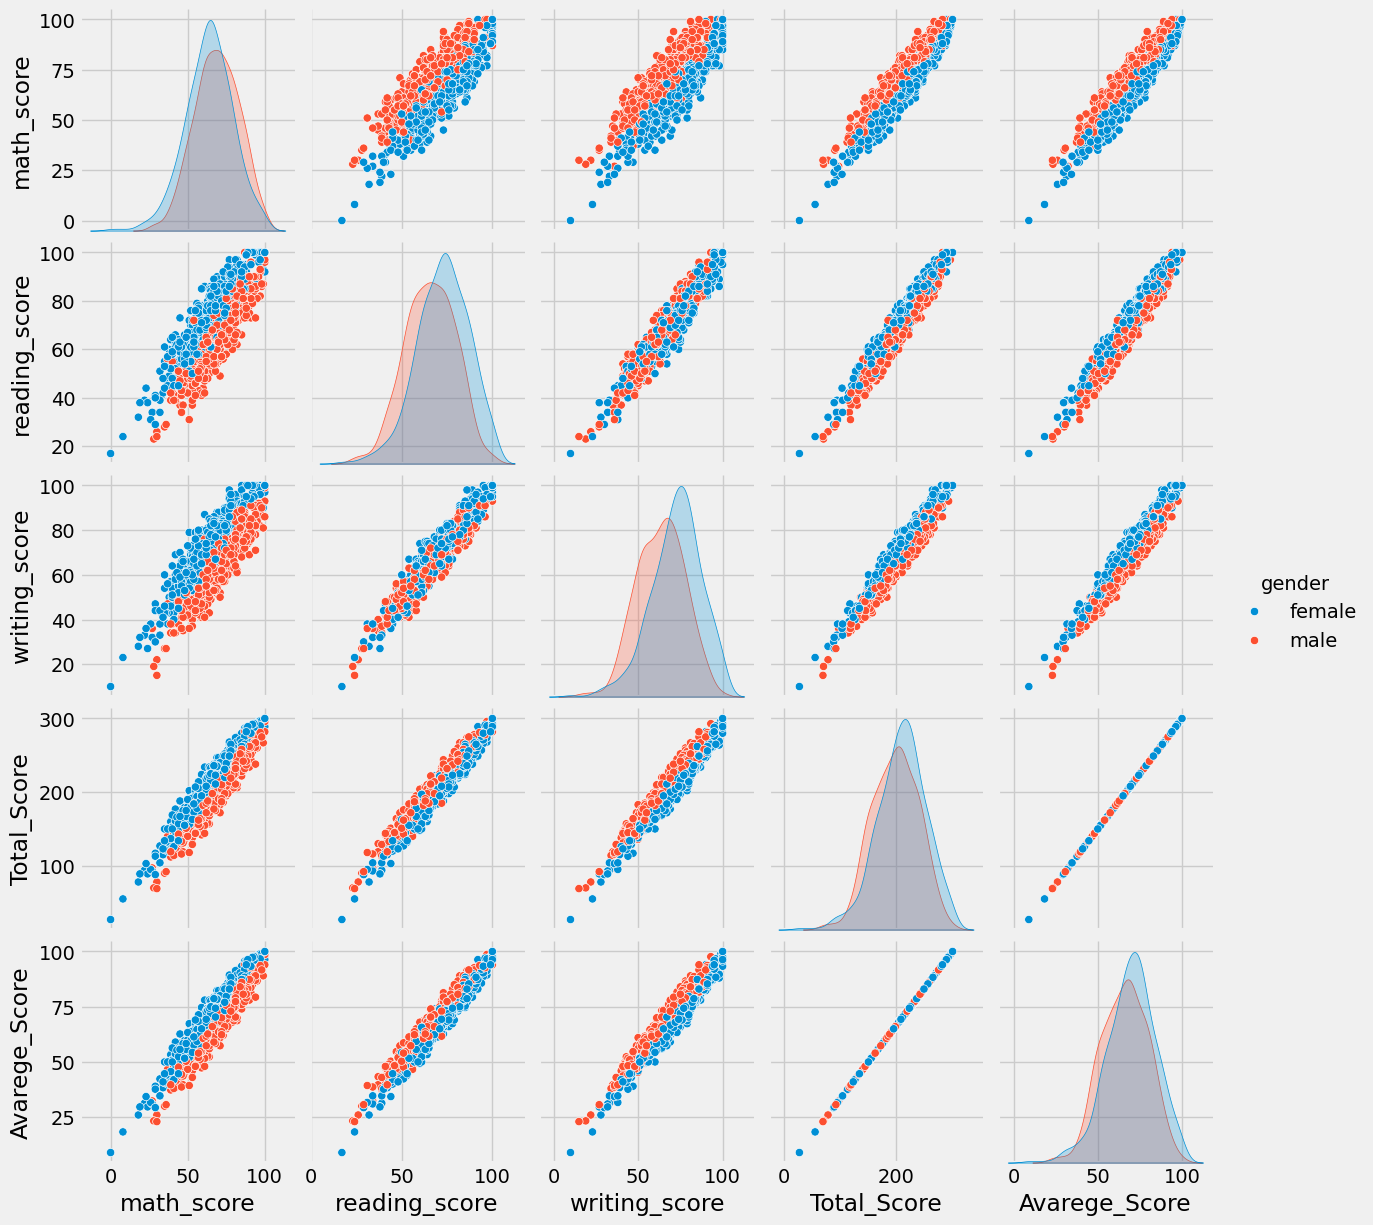

In [153]:
sns.pairplot(df2,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.



### **5 EDA ANALYSIS RESULTS & CONCLUSION**
- Student's Performance is related with lunch, race, parental level education. 
- Females lead in pass percentage and also are top-scorers. 
- Student's Performance is not much related with test preparation course. 
- Finishing preparation course is benefitial. 

